# Imports

In [1]:
from collections import Counter
import os
import os.path as osp
import pickle
import random

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
random.seed(24)
np.random.seed(24)

In [3]:
fname = osp.join('..', 'data', 'task5.pkl')
with open(fname, 'rb') as fin:
    data = pickle.load(fin)
    
data.keys()

dict_keys(['adj_matrix', 'adj_list', 'conn_components', 'shortest_paths'])

# Draw a graph

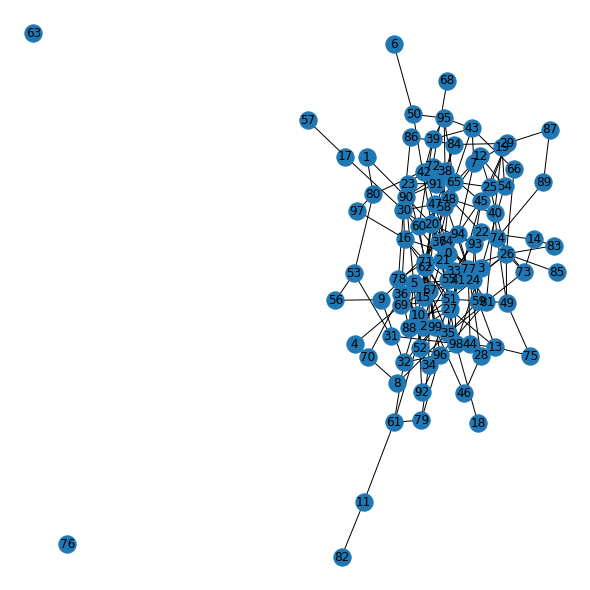

In [6]:
g = nx.Graph()

for vert, adj_verts in data["adj_list"].items():
    g.add_node(vert)
    for adj_vert in adj_verts:
        if not g.has_edge(vert, adj_vert):
            g.add_edge(vert, adj_vert)

plt.figure(figsize=(8,8))
nx.draw_spring(g, with_labels=True)
plt.savefig('graph.png');

In [7]:
data['adj_matrix'].astype(np.uint8)[:2]

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [8]:
idx = 0

for vert, adj_verts in data["adj_list"].items():
    print(f"{vert}: {adj_verts}")
    idx += 1
    if idx > 2:
        break

0: {16, 41, 3}
1: {80, 90}
2: {64, 33, 78, 27, 61}


# Analyse DFS and BFS

In [9]:
print("Connected components: \n")
for comp_idx, comp in enumerate(data['conn_components']):
    print(f"Connected component {comp_idx}: {len(comp['component'])} vertices, {comp['n_calls']} calls")

Connected components: 

Connected component 0: 98 vertices, 498 calls
Connected component 1: 1 vertices, 1 calls
Connected component 2: 1 vertices, 1 calls


In [10]:
sorted_paths = sorted(data['shortest_paths'], key=lambda x: (x['path_len'], x['n_calls']))
longest_path_len = sorted_paths[-1]['path_len']
longest_paths = list(filter(lambda x: x['path_len'] == longest_path_len, sorted_paths))
fahrest_vertices = []
for path in longest_paths:
    fahrest_vertices.extend(path['vertices'])
count = Counter(fahrest_vertices)
print(f"The longest path length is {longest_path_len} between {len(longest_paths)} vertices pairs, "+ \
      f"{count.most_common(1)[0][1]} of them ending in vertex {count.most_common(1)[0][0]}. "
      f"Number of calls: from {longest_paths[0]['n_calls']} (vertices {longest_paths[0]['vertices']}) "+ \
      f"to {longest_paths[-1]['n_calls']} (vertices {longest_paths[-1]['vertices']}).")

The longest path length is 8 between 17 vertices pairs, 15 of them ending in vertex 82. Number of calls: from 263 (vertices {97, 82}) to 495 (vertices {56, 57}).
